In [ ]:
!pip install tweepy
!pip install textblob
!pip install wordcloud
!pip install pandas
!pip install numpy
!pip install re
!pip install matplotlib.pyplot

In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv("jayapura1.csv")

In [4]:
#di translate ke inggris karena sentiment menggunakan textblob hanya bisa menggunakan bahasa inggris
df.head()

,created_at,text,tweet_en
0,Mon Jul 27 00:28:11 +0000 2015,#indonesia @arbib Sejumlah warga di Kelurahan ...,#indonesia @arbib A number of residents in Abe...
1,Sun Sep 09 04:48:19 +0000 2018,I'm at PMI RSUD Dok II | Unit Transfusi Darah ...,I'm at PMI RSUD Dok II | Jayapura City Blood T...
2,Wed Sep 24 14:00:51 +0000 2014,Dinkes Kota Jayapura Tuntas Bagi KelambuÃ‚Â Ma...,Jayapura City Health Office Completely Distrib...
3,Wed May 10 03:54:43 +0000 2017,Penyerahan Kartu Indonesia Sehat oleh Presiden...,Presentation of the Healthy Indonesia Card by ...
4,Thu Nov 01 19:06:55 +0000 2018,RSUD Dok II @Kota_Jayapura https://t.co/knseYm...,RSUD Dok II @Kota_Jayapura https://t.co/knseYm...


In [5]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    
    return text

df['tweet_en'] = df['tweet_en'].apply(cleanTxt)
df['text'] = df['text'].apply(cleanTxt)
df

,created_at,text,tweet_en
0,Mon Jul 27 00:28:11 +0000 2015,indonesia Sejumlah warga di Kelurahan Abepant...,indonesia A number of residents in Abepantai ...
1,Sun Sep 09 04:48:19 +0000 2018,I'm at PMI RSUD Dok II | Unit Transfusi Darah ...,I'm at PMI RSUD Dok II | Jayapura City Blood T...
2,Wed Sep 24 14:00:51 +0000 2014,Dinkes Kota Jayapura Tuntas Bagi KelambuÃ‚Â Ma...,Jayapura City Health Office Completely Distrib...
3,Wed May 10 03:54:43 +0000 2017,Penyerahan Kartu Indonesia Sehat oleh Presiden...,Presentation of the Healthy Indonesia Card by ...
4,Thu Nov 01 19:06:55 +0000 2018,RSUD Dok II _Jayapura,RSUD Dok II _Jayapura
...,...,...,...
118,Mon Feb 19 14:47:09 +0000 2018,Ratusan perusahaan di Kota Jayapura daftarkan ...,Hundreds of companies in Jayapura City registe...
119,Tue Jun 09 17:07:18 +0000 2020,Tujuh Rumah Sakit Rujukan Covid-19 di Kota Jay...,Seven Covid-19 Referral Hospitals in Jayapura ...
120,Fri Nov 13 11:22:46 +0000 2020,Kapolresta Dampingi Walikota Resmikan Rumah Sa...,Kapolresta Accompanying the Mayor Inaugurates ...
121,Thu Oct 10 04:33:52 +0000 2019,Itukan menurut lu. Adek gue kerja di papu...,@ Destro76293786 That's what you think. My...


In [6]:
#mendapatkan subjectivity dan polarity
def getSubjectivity(text):
    c = str(text)
    return TextBlob(c).sentiment.subjectivity

def getPolarity(text):
    c = str(text)
    return TextBlob(c).sentiment.polarity

df['Subjectivity'] = df['tweet_en'].apply(getSubjectivity)
df['Polarity'] = df['tweet_en'].apply(getPolarity)

In [7]:
df

,created_at,text,tweet_en,Subjectivity,Polarity
0,Mon Jul 27 00:28:11 +0000 2015,indonesia Sejumlah warga di Kelurahan Abepant...,indonesia A number of residents in Abepantai ...,0.00,0.00
1,Sun Sep 09 04:48:19 +0000 2018,I'm at PMI RSUD Dok II | Unit Transfusi Darah ...,I'm at PMI RSUD Dok II | Jayapura City Blood T...,0.00,0.00
2,Wed Sep 24 14:00:51 +0000 2014,Dinkes Kota Jayapura Tuntas Bagi KelambuÃ‚Â Ma...,Jayapura City Health Office Completely Distrib...,0.40,0.10
3,Wed May 10 03:54:43 +0000 2017,Penyerahan Kartu Indonesia Sehat oleh Presiden...,Presentation of the Healthy Indonesia Card by ...,0.50,0.50
4,Thu Nov 01 19:06:55 +0000 2018,RSUD Dok II _Jayapura,RSUD Dok II _Jayapura,0.00,0.00
...,...,...,...,...,...
118,Mon Feb 19 14:47:09 +0000 2018,Ratusan perusahaan di Kota Jayapura daftarkan ...,Hundreds of companies in Jayapura City registe...,0.00,0.00
119,Tue Jun 09 17:07:18 +0000 2020,Tujuh Rumah Sakit Rujukan Covid-19 di Kota Jay...,Seven Covid-19 Referral Hospitals in Jayapura ...,0.55,0.35
120,Fri Nov 13 11:22:46 +0000 2020,Kapolresta Dampingi Walikota Resmikan Rumah Sa...,Kapolresta Accompanying the Mayor Inaugurates ...,0.00,0.00
121,Thu Oct 10 04:33:52 +0000 2019,Itukan menurut lu. Adek gue kerja di papu...,@ Destro76293786 That's what you think. My...,0.00,0.00


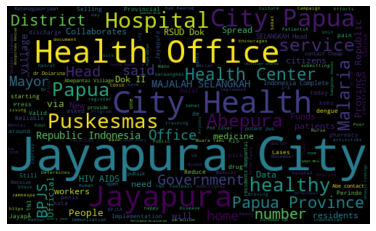

In [8]:
#wordcloud
allwords = ' '.join([twts for twts in df['tweet_en']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allwords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [9]:
#mendapatkan nilai sentimen
def getAnalysis(score):
    if score < 0 :
        return 'Negative'
    elif score == 0 :
        return 'Neutral'
    else :
        return 'Positive'

df['Sentiment'] = df['Polarity'].apply(getAnalysis)

df

,created_at,text,tweet_en,Subjectivity,Polarity,Sentiment
0,Mon Jul 27 00:28:11 +0000 2015,indonesia Sejumlah warga di Kelurahan Abepant...,indonesia A number of residents in Abepantai ...,0.00,0.00,Neutral
1,Sun Sep 09 04:48:19 +0000 2018,I'm at PMI RSUD Dok II | Unit Transfusi Darah ...,I'm at PMI RSUD Dok II | Jayapura City Blood T...,0.00,0.00,Neutral
2,Wed Sep 24 14:00:51 +0000 2014,Dinkes Kota Jayapura Tuntas Bagi KelambuÃ‚Â Ma...,Jayapura City Health Office Completely Distrib...,0.40,0.10,Positive
3,Wed May 10 03:54:43 +0000 2017,Penyerahan Kartu Indonesia Sehat oleh Presiden...,Presentation of the Healthy Indonesia Card by ...,0.50,0.50,Positive
4,Thu Nov 01 19:06:55 +0000 2018,RSUD Dok II _Jayapura,RSUD Dok II _Jayapura,0.00,0.00,Neutral
...,...,...,...,...,...,...
118,Mon Feb 19 14:47:09 +0000 2018,Ratusan perusahaan di Kota Jayapura daftarkan ...,Hundreds of companies in Jayapura City registe...,0.00,0.00,Neutral
119,Tue Jun 09 17:07:18 +0000 2020,Tujuh Rumah Sakit Rujukan Covid-19 di Kota Jay...,Seven Covid-19 Referral Hospitals in Jayapura ...,0.55,0.35,Positive
120,Fri Nov 13 11:22:46 +0000 2020,Kapolresta Dampingi Walikota Resmikan Rumah Sa...,Kapolresta Accompanying the Mayor Inaugurates ...,0.00,0.00,Neutral
121,Thu Oct 10 04:33:52 +0000 2019,Itukan menurut lu. Adek gue kerja di papu...,@ Destro76293786 That's what you think. My...,0.00,0.00,Neutral


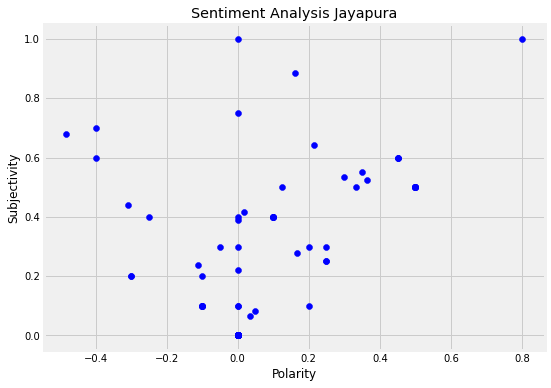

In [10]:
#plot the polarity and subjectivity
plt.figure(figsize =(8,6))
for i in range (0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')

plt.title("Sentiment Analysis Jayapura")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

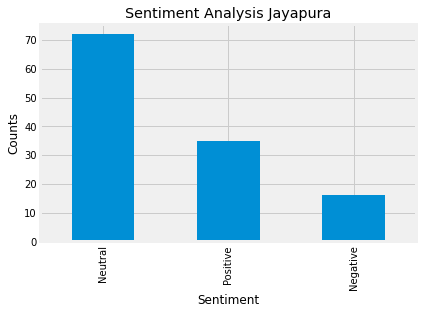

In [11]:
#Plot the sentiment
df['Sentiment'].value_counts()

plt.title("Sentiment Analysis Jayapura")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
df['Sentiment'].value_counts().plot(kind = "bar")
plt.show()

In [12]:
df_final = df[['created_at', 'text', 'Subjectivity', 'Polarity', 'Sentiment']]

In [13]:
df_final

,created_at,text,Subjectivity,Polarity,Sentiment
0,Mon Jul 27 00:28:11 +0000 2015,indonesia Sejumlah warga di Kelurahan Abepant...,0.00,0.00,Neutral
1,Sun Sep 09 04:48:19 +0000 2018,I'm at PMI RSUD Dok II | Unit Transfusi Darah ...,0.00,0.00,Neutral
2,Wed Sep 24 14:00:51 +0000 2014,Dinkes Kota Jayapura Tuntas Bagi KelambuÃ‚Â Ma...,0.40,0.10,Positive
3,Wed May 10 03:54:43 +0000 2017,Penyerahan Kartu Indonesia Sehat oleh Presiden...,0.50,0.50,Positive
4,Thu Nov 01 19:06:55 +0000 2018,RSUD Dok II _Jayapura,0.00,0.00,Neutral
...,...,...,...,...,...
118,Mon Feb 19 14:47:09 +0000 2018,Ratusan perusahaan di Kota Jayapura daftarkan ...,0.00,0.00,Neutral
119,Tue Jun 09 17:07:18 +0000 2020,Tujuh Rumah Sakit Rujukan Covid-19 di Kota Jay...,0.55,0.35,Positive
120,Fri Nov 13 11:22:46 +0000 2020,Kapolresta Dampingi Walikota Resmikan Rumah Sa...,0.00,0.00,Neutral
121,Thu Oct 10 04:33:52 +0000 2019,Itukan menurut lu. Adek gue kerja di papu...,0.00,0.00,Neutral


In [14]:
df_final.to_csv("sentiment_jayapura.csv")